# Importing JP's Formation Pick spredsheet

In [67]:
import pandas as pd

df = pd.read_excel("../Geological_data/Dwer_data\Formation picks.xls",sheet_name = "Formatted to create txt file")

In [68]:
df

,Easting,Northing,Source,ID,Ground,TQ,Tr,Tkm,Tk,Tkc,...,Kwlp,Kwlw,Kwlm,Kws,Kwg,Kpc,Kps,Kpo,Jy,Jc
0,-999.0,-999.0,PRAMS Formation Picks,JWS1,22.0,45,-,-,-,-,...,236,342,429,484,555,-,-,-,822,-
1,-999.0,-999.0,PRAMS Formation Picks,P7,67.0,6,-,-,-,-,...,-,256,277,350,-,555,-,-,-,-
2,-999.0,-999.0,PRAMS Formation Picks,WP,4.0,30,-,-,-,-,...,-,67,207,324,399,-,-,-,449,-
3,329743.0,6617059.0,PRAMS Formation Picks,ML8,39.0,24,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,387569.0,6613192.0,PRAMS Formation Picks,ML2,206.0,3,-,-,-,-,...,27,298,346,-,-,762,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,387523.0,6403674.0,PRAMS Formation Picks,AM65,2.0,9,57,-,-,-,...,-,69,188,208,-,-,-,-,-,363
408,403632.0,6402890.0,PRAMS Formation Picks,AM69,41.0,2,-,-,-,-,...,-,-,60,-,-,-,-,-,-,417
409,382835.0,6402182.0,PRAMS Formation Picks,AM67,11.0,21,44,-,-,-,...,-,96,186,246,-,-,-,-,-,375
410,390782.0,6398413.0,PRAMS Formation Picks,AM68,9.0,8,58,-,-,-,...,-,80,176,203,287,-,-,-,-,327


# Basic stats

Let's just look at average thicknesses of each of the formations.

In [69]:
keys = df.keys()[5:]

In [70]:
import numpy as np

last = np.zeros(len(df))
tdum = []
for key in keys:
    data = df[key]
    x = np.zeros(len(data))
    for i in range(len(data)):
        if type(data[i]) == type(1.2) or type(data[i]) == type(1):
            x[i] = data[i]
        else:
            x[i] = -999.
    total = len(x)
    reported = len(x[x>0])
    thick = x[x>0] - last[x>0]
    print(key , "is present in ", str(round(reported/total * 100.,2)), "% of bores and has an average thickness of " , str(np.average(thick)),"m")
    tdum.append(np.round(np.average(thick),0))
    
    last[x>0.] = x[x>0.]
print(tdum)
print(x)



TQ is present in  94.42 % of bores and has an average thickness of  48.32394775526993 m
Tr is present in  5.34 % of bores and has an average thickness of  41.78609716818182 m
Tkm is present in  17.72 % of bores and has an average thickness of  55.26862395205479 m
Tk  is present in  13.59 % of bores and has an average thickness of  179.83791413392856 m
Tkc is present in  8.98 % of bores and has an average thickness of  65.25114082972974 m
Kcl is present in  2.67 % of bores and has an average thickness of  28.727272727272727 m
Kcp is present in  7.77 % of bores and has an average thickness of  27.03125 m
Kcg is present in  10.44 % of bores and has an average thickness of  14.488372093023257 m
Kcm is present in  13.59 % of bores and has an average thickness of  24.098214285714285 m
Kcom is present in  31.55 % of bores and has an average thickness of  40.2002660446944 m
Kcok is present in  47.57 % of bores and has an average thickness of  50.83905236574346 m
Kcoh is present in  35.68 % of 

In [71]:
w_all = []
for i in range(len(data)):
    w = []
    for key in keys:
        if type(df.iloc[i][key]) == type(1.) or type(df.iloc[i][key]) == type(1):
            w.append(df.iloc[i][key])
        else:
            w.append(-999.)
    w = np.array(w)
    w_all.append(w)
        
feat = ["TQ_strat",
        "TQ_strat",
       "Tertiary",
       "Tertiary",
       "Tertiary",
       "Tertiary",
       "Coolyena",
       "Coolyena",
       "Coolyena",
       "Coolyena",
       "Coolyena",
       "Coolyena",
       "Coolyena",
       "Warnbro",
       "Warnbro",
       "Warnbro",
       "Warnbro",
       "Warnbro",
       "LKEJ",
       "LKEJ",
       "LKEJ",
       "LKEJ",
       "LKEJ"]   

In [72]:
len(feat)

23

So I guess we will use the average thickness to define the scalar values. I am unsire about the strat columns:

1) Quaternry

(Quaternay unconformity)

2) Kings park

(Unconformity)

3) Coolyeena Group

(Unconformity)

4) Warnbro Group

(Breakup unconformity)

5) parmelia - Yarragadee - cattamarra

there are unconformities in each group, and no formation is omnipresent, so we could also look at each formation as it's own strat unit.

Okay. There are lots of models, but lets look for data between 6527000m North and 6537000m North to start with, see how it looks, the proceef if it is interesting.


In [73]:
df1 = df.loc[(df['Northing'] >= 6527000)] 
df1 = df1.loc[(df1['Northing'] <= 6537000)]
print(df1)
w_all = []
for i in range(len(df1)):
    w = []
    for key in keys:
        if type(df1.iloc[i][key]) == type(1.) or type(df1.iloc[i][key]) == type(1):
            w.append(df1.iloc[i][key])
        else:
            w.append(-999.)
    w = np.array(w)
    w_all.append(w)

     Easting   Northing                  Source     ID  Ground  TQ   Tr  Tkm  \
31  367173.0  6535521.0   PRAMS Formation Picks    AM3   27.00  39    -    -   
32  383790.0  6535459.0   PRAMS Formation Picks    AM4   50.00  41    -    -   
33  374139.0  6535349.0   PRAMS Formation Picks    TPK   60.00  42    -    -   
34  392430.0  6534424.0   PRAMS Formation Picks    GY1   82.48  30    -    -   
35  362041.0  6534075.0   PRAMS Formation Picks    GB4    9.00  45    -    -   
36  373194.0  6533955.0   PRAMS Formation Picks    GB3   31.00  34    -    -   
37  407026.0  6533780.0   PRAMS Formation Picks    PER  185.00   -    -    -   
38  396819.0  6533529.0   PRAMS Formation Picks  CHER1  105.00   1    -    -   
39  366379.0  6533124.0   PRAMS Formation Picks    GB2   58.00  46    -    -   
40  399706.0  6532768.0   PRAMS Formation Picks   MBRK  105.00   5    -    -   
41  396339.0  6532249.0   PRAMS Formation Picks   GG75  115.00   -    -    -   
42  384139.0  6532149.0   PRAMS Formatio

In [74]:
#lets make the data to put into the model
X = []
Y = []
Z = []
Unit_ID = []
feature_name = []
unit = []
val = []

base_val = [48.]
for i in range(len(tdum)):
    base_val.append(base_val[-1]-tdum[i])
    



In [75]:
len(base_val)

23

In [76]:
#keys = df1.keys()[4:]

In [77]:
"""i = 0
for key in keys:
    for j in range(len(df1)):
        if type(df1.iloc[j][key]) == type(1.) or type(df1.iloc[j][key]) == type(1):
            X.append(df1.iloc[j]["Easting"])
            Y.append(df1.iloc[j]["Northing"])
            Z.append(df1.iloc[j]["Ground"]-df1.iloc[j][key])
            Unit_ID.append(key)
            feature_name.append(key+'_strat')
            unit.append(key)
            val.append(base_val[i])
            if i > 0:
                X.append(df1.iloc[j]["Easting"])
                Y.append(df1.iloc[j]["Northing"]) 
                if type(df1.iloc[j][keyold]) == type(1.) or type(df1.iloc[j][keyold]) == type(1):
                    Z.append(df1.iloc[j]["Ground"]-df1.iloc[j][keyold])
                else:
                    Z.append(df1.iloc[j]["Ground"]-df1.iloc[j][key]+tdum[i-1])
                Unit_ID.append(key)
                feature_name.append(key+'_strat')
                unit.append(key)
                val.append(base_val[i-1])                
                
    i+=1
    keyold = np.copy(key)"""

            
    

'i = 0\nfor key in keys:\n    for j in range(len(df1)):\n        if type(df1.iloc[j][key]) == type(1.) or type(df1.iloc[j][key]) == type(1):\n            X.append(df1.iloc[j]["Easting"])\n            Y.append(df1.iloc[j]["Northing"])\n            Z.append(df1.iloc[j]["Ground"]-df1.iloc[j][key])\n            Unit_ID.append(key)\n            feature_name.append(key+\'_strat\')\n            unit.append(key)\n            val.append(base_val[i])\n            if i > 0:\n                X.append(df1.iloc[j]["Easting"])\n                Y.append(df1.iloc[j]["Northing"]) \n                if type(df1.iloc[j][keyold]) == type(1.) or type(df1.iloc[j][keyold]) == type(1):\n                    Z.append(df1.iloc[j]["Ground"]-df1.iloc[j][keyold])\n                else:\n                    Z.append(df1.iloc[j]["Ground"]-df1.iloc[j][key]+tdum[i-1])\n                Unit_ID.append(key)\n                feature_name.append(key+\'_strat\')\n                unit.append(key)\n                val.append(bas

In [78]:
#Start with the Quaternary and Tertiary:
keys = df1.keys()[5:]
nax = np.zeros(len(w_all))
i = 0
for key in keys:
    for j in range(len(df1)):
        if type(df1.iloc[j][key]) == type(1.) or type(df1.iloc[j][key]) == type(1):
            if i < len(base_val)-1:
                if np.max(w_all[j]) != df1.iloc[j][key]:
                    X.append(df1.iloc[j]["Easting"])
                    Y.append(df1.iloc[j]["Northing"])
                    feature_name.append(feat[i])
                    unit.append(key)
                    Z.append(df1.iloc[j]["Ground"]-df1.iloc[j][key])
                    val.append(base_val[i])
                else: 
                    X.append(df1.iloc[j]["Easting"])
                    Y.append(df1.iloc[j]["Northing"])
                    feature_name.append(feat[i])
                    unit.append(key)
                    Z.append(df1.iloc[j]["Ground"]-np.max(w_all[j][:i]))
                    val.append(base_val[i-1])
            '''X.append(df1.iloc[j]["Easting"])
            Y.append(df1.iloc[j]["Northing"])
            feature_name.append(feat[i])
            unit.append(key)
            Z.append(df1.iloc[j]["Ground"]-nax[j])
            val.append(base_val[i-1])
            if i < len(base_val)-1:
                if np.max(w_all[j]) != df1.iloc[j][key]:
                    nax[j] = df1.iloc[j][key]'''
        '''else:
            X.append(df1.iloc[j]["Easting"])
            Y.append(df1.iloc[j]["Northing"])
            feature_name.append(feat[i])
            unit.append(key)
            Z.append(df1.iloc[j]["Ground"]-nax[j])
            val.append(base_val[i])'''       
    i+= 1
    
for i in range(len(w_all)):
    #add unconformities
    #Tertiary:
    X.append(df1.iloc[i]["Easting"])
    Y.append(df1.iloc[i]["Northing"])
    feature_name.append("UNC1")
    unit.append("TU")
    val.append(1.) 
    Z.append(df1.iloc[j]["Ground"]-np.max(w_all[i][:6])+1.)
    X.append(df1.iloc[i]["Easting"])
    Y.append(df1.iloc[i]["Northing"])
    feature_name.append("UNC1")
    unit.append("TU")
    val.append(-1.) 
    Z.append(df1.iloc[j]["Ground"]-np.max(w_all[i][:6])-1.)
    
    if np.max(w_all[i][13:]) > 0:
        X.append(df1.iloc[i]["Easting"])
        Y.append(df1.iloc[i]["Northing"])
        feature_name.append("UNC2")
        unit.append("CU")
        val.append(1.)  
        Z.append(df1.iloc[j]["Ground"]-np.max(w_all[i][:13])+1.)  
        X.append(df1.iloc[i]["Easting"])
        Y.append(df1.iloc[i]["Northing"])
        feature_name.append("UNC2")
        unit.append("CU")
        val.append(-1.)  
        Z.append(df1.iloc[j]["Ground"]-np.max(w_all[i][:13])-1.)  
    
    if np.max(w_all[i][18:]) < 0:
        X.append(df1.iloc[i]["Easting"])
        Y.append(df1.iloc[i]["Northing"])
        feature_name.append("UNC3")
        unit.append("BU")
        val.append(1.) 
        Z.append(df1.iloc[j]["Ground"]-np.max(w_all[i][:18])+1.)
        X.append(df1.iloc[i]["Easting"])
        Y.append(df1.iloc[i]["Northing"])
        feature_name.append("UNC3")
        unit.append("BU")
        val.append(-1.) 
        Z.append(df1.iloc[j]["Ground"]-np.max(w_all[i][:18])-1.)   
                
                
    


In [79]:
w_all[0]

array([  39., -999., -999., -999., -999.,   44., -999.,   60.,   70.,
       -999.,  164., -999.,  167.,  606.,  729., -999., -999., -999.,
       -999., -999., -999., -999.])

In [80]:
data_dict = {"X": X,
             "Y": Y,
             "Z": Z,
             "feature_name": feature_name,
             "unit": unit,
             "val": val,}

In [81]:
print(len(X),len(Y))
keys = df1.keys()[4:]


251 251


In [82]:
data = pd.DataFrame(data_dict)
#might fix this with some geophysics
data["strike"]=np.nan
data["dip"]=np.nan
data["nx"]=np.nan
data["ny"]=np.nan
data["nz"]=np.nan

In [83]:
data

,X,Y,Z,feature_name,unit,val,strike,dip,nx,ny,nz
0,367173.0,6535521.0,-12.00,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,NaN
1,383790.0,6535459.0,9.00,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,NaN
2,374139.0,6535349.0,18.00,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,NaN
3,392430.0,6534424.0,52.48,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,NaN
4,362041.0,6534075.0,-36.00,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
246,399819.0,6527569.0,47.00,UNC2,CU,0.0,NaN,NaN,NaN,NaN,NaN
247,399819.0,6527569.0,-51.00,UNC3,BU,0.0,NaN,NaN,NaN,NaN,NaN
248,398039.0,6527349.0,1119.00,UNC1,TU,0.0,NaN,NaN,NaN,NaN,NaN
249,398039.0,6527349.0,21.00,UNC2,CU,0.0,NaN,NaN,NaN,NaN,NaN


In [105]:
from LoopStructural import GeologicalModel
x0, y0, z0 = 350000., 6527000., -850. 
x1, y1, z1 = 420000., 6537000., 185.
origin  = (x0, y0, z0)
maximum = (x1, y1, z1)
model = GeologicalModel(origin, maximum)
model.data = data

In [106]:
#Add the surfaces:
#do the top first
Quat = model.create_and_add_foliation("TQ_strat", nelements=1e5) #it was 1e5
uc1 = model.add_unconformity(Quat, base_val[0])
#These aren't present in this lottle model

"""#Rockingam Sands
RS = model.create_and_add_foliation("Tr_strat", nelements=1e5) #it was 1e5
uc2 = model.add_unconformity(model["Tr_strat"], base_val[2])

#Mullalloo Sandstons
Mull = model.create_and_add_foliation("Tkm_strat", nelements=1e5) #it was 1e5
uc3 = model.add_unconformity(model["Tkm_strat"], base_val[3])

#Kings Park Formation
Kings = model.create_and_add_foliation("Tk_strat", nelements=1e5) #it was 1e5
uc4 = model.add_unconformity(model["Tk_strat"], base_val[4])

#Como Sandstone
Como = model.create_and_add_foliation("Tkc_strat", nelements=1e5) #it was 1e5
uc5 = model.add_unconformity(model["Tkc_strat"], base_val[5])"""

"""Tert = model.create_and_add_foliation( "Tertiary", nelements=1e5) #it was 1e5

TU = model.create_and_add_foliation("UNC1", nelements=1e5)
uc5 = model.add_unconformity(TU, 0.)"""

"""
#Lancellin Formation
Lanc = model.create_and_add_foliation("Kcl_strat", nelements=1e5) #it was 1e5
#uc6 = model.add_unconformity(model["Kcl_strat"], base_val[6])

#Poisson Greensand
Pois = model.create_and_add_foliation("Kcp_strat", nelements=1e5) #it was 1e5
#uc7 = model.add_unconformity(model["Kcp_strat"], base_val[7])

#Gingin Chalk
Ging = model.create_and_add_foliation("Kcg_strat", nelements=1e5) #it was 1e5
#uc8 = model.add_unconformity(model["Kcg_strat"], base_val[8])

#Molecap Sands
Mole = model.create_and_add_foliation("Kcm_strat", nelements=1e5) #it was 1e5
#uc9 = model.add_unconformity(model["Kcm_strat"], base_val[9])

#Mirrabooka member
Mirr = model.create_and_add_foliation("Kcom_strat", nelements=1e5) #it was 1e5
#uc10 = model.add_unconformity(model["Kcom_strat"], base_val[10])

#Kardinya Shale
Kard =  model.create_and_add_foliation("Kcok_strat", nelements=1e5) #it was 1e5
uc11 = model.add_unconformity(model["Kcok_strat"], base_val[11])"""

#Coolyena Group

Cool = model.create_and_add_foliation("Coolyena", nelements=1e5)
#TU = model.add_onlap_unconformity(Cool,base_val[6])
CU = model.create_and_add_foliation("UNC2", nelements=1e5)
uc12 = model.add_unconformity(CU, 0.)
"""
#Henley Sandstone Member
Henl =  model.create_and_add_foliation("Kcoh_strat", nelements=1e5) #it was 1e5
uc12 = model.add_unconformity(model["Kcoh_strat"], base_val[12])
"""

"""#Pinjar
Pinj = model.create_and_add_foliation("Kwlp_strat", nelements=1e5) #it was 1e5
uc13 = model.add_unconformity(model["Kwlp_strat"], base_val[13])

#Wanneroo
Wann = model.create_and_add_foliation("Kwlw_strat", nelements=1e5) #it was 1e5
uc14 = model.add_unconformity(model["Kwlw_strat"], base_val[14])


#marriginiiup (I know I can't spell)
Mari = model.create_and_add_foliation("Kwlm_strat", nelements=1e5) #it was 1e5
uc15 = model.add_unconformity(model["Kwlm_strat"], base_val[15])

#South Perth Shale
SPS = model.create_and_add_foliation("Kws_strat", nelements=1e5) #it was 1e5
uc16 = model.add_unconformity(model["Kws_strat"], base_val[16])

#Gage Formation
Gage = model.create_and_add_foliation("Kwg_strat", nelements=1e5) #it was 1e5
uc17 = model.add_unconformity(model["Kwg_strat"], base_val[17])"""

#Warnbro Group
Warn = model.create_and_add_foliation("Warnbro", nelements=1e5) #it was 1e5
#CU = model.add_onlap_unconformity(Warn,base_val[12])
BU = model.create_and_add_foliation("UNC3", nelements=1e5)
uc17 = model.add_unconformity(BU, 0.)
#Brek Up unconformity

""""#Carnac member
Carn = model.create_and_add_foliation("Kpc_strat", nelements=1e5) #it was 1e5
uc18 = model.add_unconformity(model["Kpc_strat"], base_val[18])

#Parmelia Sand member
Parm = model.create_and_add_foliation("Kps_strat", nelements=1e5) #it was 1e5
uc19 = model.add_unconformity(model["Kps_strat"], base_val[19])

#Ottowirri fmn
Otto = model.create_and_add_foliation("Kpo_strat", nelements=1e5) #it was 1e5
uc20 = model.add_unconformity(model["Kpo_strat"], base_val[20])

#Yarragadee
Yarr = model.create_and_add_foliation("Jy_strat", nelements=1e5) #it was 1e5
uc21 = model.add_unconformity(model["Jy_strat"], base_val[21])


#Cattamarra Coal Measures
Catt = model.create_and_add_foliation("Jc_strat", nelements=1e5) #it was 1e5
uc22 = model.add_unconformity(model["Jc_strat"], base_val[22])
"""
#Parmelia and Yargadee:
LKEJ = model.create_and_add_foliation("LKEJ", nelements=1e5)
#BU = model.add_onlap_unconformity(LKEJ,base_val[17])

Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region
Cannot use region


In [107]:
model.data


,X,Y,Z,feature_name,unit,val,nx,ny,nz,tx,...,tz,gx,gy,gz,w,coord,interface,polarity,l,u
0,17173.0,8521.0,838.00,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.0,NaN,NaN
1,33790.0,8459.0,859.00,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.0,NaN,NaN
2,24139.0,8349.0,868.00,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.0,NaN,NaN
3,42430.0,7424.0,902.48,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.0,NaN,NaN
4,12041.0,7075.0,814.00,TQ_strat,TQ,48.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,49819.0,569.0,897.00,UNC2,CU,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.0,NaN,NaN
247,49819.0,569.0,799.00,UNC3,BU,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.0,NaN,NaN
248,48039.0,349.0,1969.00,UNC1,TU,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.0,NaN,NaN
249,48039.0,349.0,871.00,UNC2,CU,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0,NaN,1.0,NaN,NaN


In [108]:
litho = []
for i in range(len(keys)):
    litho.append(keys[i])

In [109]:
lith_list = [1,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21]
litho = []
for i in range(len(keys)):
    if i in lith_list:
        litho.append(keys[i])

In [110]:
litho

['TQ',
 'Kcl',
 'Kcp',
 'Kcg',
 'Kcm',
 'Kcom',
 'Kcok',
 'Kwlp',
 'Kwlw',
 'Kwlm',
 'Kws',
 'Kwg',
 'Kpc',
 'Kps',
 'Kpo',
 'Jy']

In [111]:
stratigraphic_column = {}
"""for i in range(len(lith_list)-5):
    stratigraphic_column[litho[i]+'_strat'] = {}
    stratigraphic_column[litho[i]+'_strat'][litho[i]] =  {'min':-np.inf,'max':np.inf,'id':i+1}"""

stratigraphic_column["TQ_strat"] = {}
stratigraphic_column["TQ_strat"]["Sky"] =  {'min':base_val[0],'max':np.inf,'id':0}
stratigraphic_column["TQ_strat"]["Super"] =  {'min':-np.inf,'max':base_val[0],'id':1}

'''stratigraphic_column["Tert"] = {}
stratigraphic_column["Tert"]["Rockingham"] =  {'min':base_val[2],'max':np.inf,'id':2}
stratigraphic_column["Tert"]["Mullalo"] =  {'min':base_val[3],'max':base_val[2],'id':3}
stratigraphic_column["Tert"]["Kings"] =  {'min':base_val[4],'max':base_val[3],'id':4}
stratigraphic_column["Tert"]["Como"] =  {'min':-np.inf,'max':base_val[4],'id':5}

stratigraphic_column["UNC1"] = {}
stratigraphic_column["UNC1"]["TU"] =  {'min':-np.inf,'max':0.,'id':100} '''

stratigraphic_column["Coolyena"] = {}
stratigraphic_column["Coolyena"]["Lancelin"] =  {'min':base_val[6],'max':base_val[5],'id':6}
stratigraphic_column["Coolyena"]["Poison"] =  {'min':base_val[7],'max':base_val[6],'id':7}
stratigraphic_column["Coolyena"]["Gingin"] =  {'min':base_val[8],'max':base_val[7],'id':8}
stratigraphic_column["Coolyena"]["Molecap"] =  {'min':base_val[9],'max':base_val[8],'id':9}
stratigraphic_column["Coolyena"]["Mirabooka"] =  {'min':base_val[10],'max':base_val[9],'id':10}
stratigraphic_column["Coolyena"]["Kardinya"] =  {'min':base_val[11],'max':base_val[10],'id':11}
stratigraphic_column["Coolyena"]["Henley"] =  {'min':-np.inf,'max':base_val[11],'id':12}

stratigraphic_column["UNC2"] = {}
stratigraphic_column["UNC2"]["CU"] =  {'min':-np.inf,'max':0.,'id':200} 

stratigraphic_column["Warnbro"] = {}
stratigraphic_column["Warnbro"]["Pinjar"] =  {'min':base_val[13],'max':base_val[12],'id':13}
stratigraphic_column["Warnbro"]["Wanneroo"] =  {'min':base_val[14],'max':base_val[13],'id':14}
stratigraphic_column["Warnbro"]["Maringiniup"] =  {'min':base_val[15],'max':base_val[14],'id':15}
stratigraphic_column["Warnbro"]["South Perth Shale"] =  {'min':base_val[16],'max':base_val[15],'id':16}
stratigraphic_column["Warnbro"]["Gage"] =  {'min':-np.inf,'max':base_val[17],'id':17}

stratigraphic_column["UNC3"] = {}
stratigraphic_column["UNC3"]["BU"] =  {'min':-np.inf,'max':0.,'id':300} 

stratigraphic_column["LKEJ"] = {}
stratigraphic_column["LKEJ"]["Carnac"] =  {'min':base_val[18],'max':base_val[17],'id':18}
stratigraphic_column["LKEJ"]["Parmelia"] =  {'min':base_val[19],'max':base_val[18],'id':19}
stratigraphic_column["LKEJ"]["Ottorowiri"] =  {'min':base_val[20],'max':base_val[19],'id':20}
stratigraphic_column["LKEJ"]["Yarraagadee"] =  {'min':base_val[21],'max':base_val[20],'id':21}
stratigraphic_column["LKEJ"]["Cattamarra"] =  {'min':-np.inf,'max':base_val[21],'id':22}

model.set_stratigraphic_column(stratigraphic_column)

In [112]:
stratigraphic_column

{'TQ_strat': {'Sky': {'min': 48.0,
   'max': inf,
   'id': 0,
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Super': {'min': -inf,
   'max': 48.0,
   'id': 1,
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])}},
 'Coolyena': {'Lancelin': {'min': -371.0,
   'max': -342.0,
   'id': 6,
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Poison': {'min': -398.0,
   'max': -371.0,
   'id': 7,
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Gingin': {'min': -412.0,
   'max': -398.0,
   'id': 8,
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Molecap': {'min': -436.0,
   'max': -412.0,
   'id': 9,
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Mirabooka': {'min': -476.0,
   'max': -436.0,
   'id': 10,
   'colour': array([0.12156863, 0.46666667, 0.70588235, 1.        ])},
  'Kardinya': {'min': -527.0,
   'max': -476.0,
   'id': 11,
   'colour': arra

In [113]:
x = np.arange(350000,400000,100.)
z = np.arange(-800,200., 5.)
X,Z = np.meshgrid(x,z)

y = 6528279.3
#xyz = np.array([X.flatten,(np.ones_like(X)*y).flatten,Z.flatten]).T
xyz = np.zeros((len(x)*len(z),3))
xyz[:,0] = X.flatten()
xyz[:,1] = np.ones_like(X.flatten())*y
xyz[:,2] = Z.flatten()
Xsect = model.evaluate_model(xyz)
one = model.evaluate_feature_value("TQ_strat",xyz)


C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packages\LoopStructural\modelling\features\_base_geological_feature.py:199: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(self.evaluate_value(self.model.regular_grid((10, 10, 10))))
C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packages\LoopStructural\modelling\features\_base_geological_feature.py:186: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(self.evaluate_value(self.model.regular_grid((10, 10, 10))))
C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packages\LoopStructural\modelling\features\_base_geological_feature.py:199: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(self.evaluate_value(self.model.regular_grid((10, 10, 10))))
C:\Users\00098687\Anaconda3\envs\loop3denv\lib\site-packages\LoopStructural\modelling\features\_base_geological_feature.py:186: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(self.evaluate_value(self.model.regular_grid((10, 10, 10))))
C:\U

In [55]:
plt.imshow(Dum)



NameError: name 'Dum' is not defined

[[51.3077258  51.30632031 51.30491685 ... 51.33115412 51.3250444
  51.31893467]
 [51.28856181 51.28715673 51.28575367 ... 51.31328758 51.30720475
  51.30112192]
 [51.26939782 51.26799314 51.2665905  ... 51.29542104 51.2893651
  51.28330917]
 ...
 [47.5325448  47.53120408 47.52986201 ... 47.81122726 47.81051046
  47.80979367]
 [47.51338244 47.51204168 47.51069958 ... 47.79336007 47.79267072
  47.79198136]
 [47.49422007 47.49287928 47.49153714 ... 47.77549289 47.77483097
  47.77416905]]


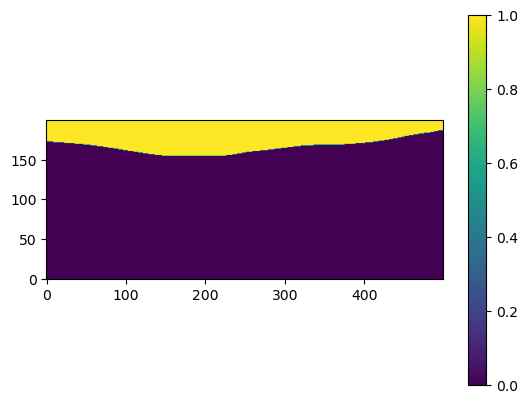

In [115]:
print(one.reshape(np.shape(Z)))

import matplotlib.pyplot as plt
plt.imshow(Xsect.reshape(np.shape(Z)),origin = 'lower')#, extent = [x[0],x[-1],z[0],z[-1]])
plt.colorbar()

In [109]:
model.evaluate_model([(350439.0,6566450.0,-500.0)])

array([0])

In [168]:
len(x)

70